In [46]:
#What is the income of your customers?
#Prepare data set
#Create Random Forest Regressor model
#Measure accuracy
#Tune the model
#Generate insights

#Directory, Libraries, and data

In [47]:
%cd /content/drive/MyDrive/Business Analyst course/Predictive Analytics/Random Forest

/content/drive/MyDrive/Business Analyst course/Predictive Analytics/Random Forest


In [48]:
import pandas as pd
import numpy as np

In [49]:
#Load the data
df=pd.read_csv("marketing_campaign.csv")
df.tail()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2235,2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,...,3,4,5,0,0,0,0,0,0,0
2236,2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,...,2,5,7,0,0,0,1,0,0,0
2237,2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,...,3,13,6,0,1,0,0,0,0,0
2238,2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,...,5,10,3,0,0,0,0,0,0,0
2239,2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,...,1,4,7,0,0,0,0,0,0,1


#Data Preparation


In [50]:
#Prepare the dataset
#Remove unwanted variables
df=df.iloc[:,2:]
df=df.drop(columns=["Dt_Customer","Recency"])
df.head()



,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,635,88,546,172,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,11,1,6,2,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,426,49,127,111,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,11,4,20,10,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,173,43,118,46,...,3,6,5,0,0,0,0,0,0,0


In [51]:
#Transform Year of Birth into Age
df['age']=2020-df.Year_Birth
df=df.drop(columns="Year_Birth")

In [52]:
#Transform Objects
df=pd.get_dummies(df, drop_first=True)

In [53]:
#NAs
df = df.dropna()
df.isna().sum()

Income                     0
Kidhome                    0
Teenhome                   0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Response                   0
age                        0
Education_Basic            0
Education_Graduation       0
Education_Master           0
Education_PhD              0
Marital_Status_Alone       0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
Marital_Status_YOLO        0
dtype: int64

In [54]:
#Summary statistics
df.describe()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.00000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,...,0.50361,0.164711,0.217058,0.001354,0.104693,0.386733,0.212545,0.258574,0.034296,0.000903
std,25173.076661,0.536896,0.544181,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,...,0.50010,0.371003,0.412335,0.036777,0.306227,0.487112,0.409201,0.437950,0.182030,0.030035
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51381.500000,0.000000,0.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,...,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68522.000000,1.000000,1.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,...,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
#Isolate X and Y
y=df.Income
x=df.drop(columns="Income")
x.head()

,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0,0,635,88,546,172,88,88,3,8,...,1,0,0,0,0,0,1,0,0,0
1,1,1,11,1,6,2,1,6,2,1,...,1,0,0,0,0,0,1,0,0,0
2,0,0,426,49,127,111,21,42,1,8,...,1,0,0,0,0,0,0,1,0,0
3,1,0,11,4,20,10,3,5,2,2,...,1,0,0,0,0,0,0,1,0,0
4,1,0,173,43,118,46,27,15,5,5,...,0,0,1,0,0,1,0,0,0,0


In [56]:
#Training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,
                                                  test_size=0.2,
                                                  random_state=1502)

In [57]:
#Random forest model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=300,
                             random_state=1502)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=1502)

#Model Assessment

In [58]:
#Predictions
predictions=model.predict(X_test)
predictions[:5]

array([66488.74      , 19450.09666667, 64682.58      , 49538.68666667,
       47827.66666667])

In [59]:
#Model Assessment: MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, predictions))
print(y_test.mean())
print(y_test.std())

6543.338626126127
50734.41891891892
22073.552789063204


#Feature Importance

<Axes: >

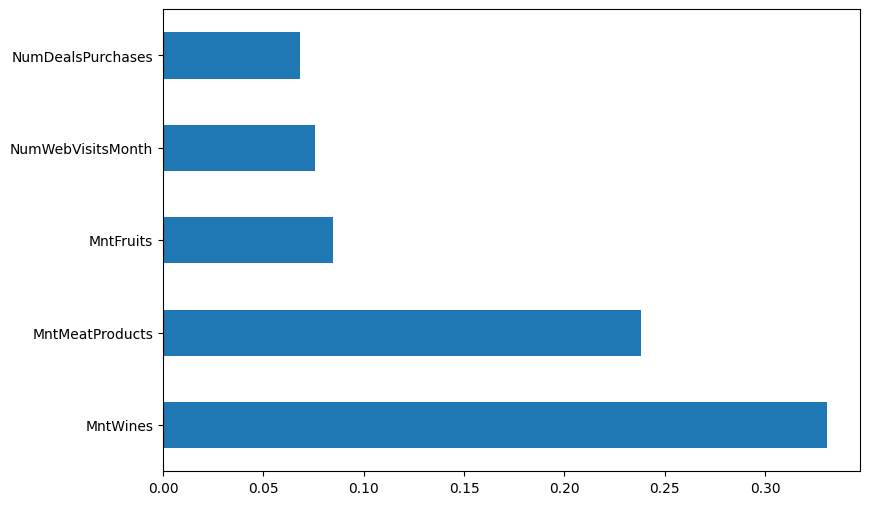

In [60]:
#Importance plot
importance = pd.Series(model.feature_importances_,
                       index=X_train.columns.values)
importance.nlargest(5).plot(kind='barh',
                            figsize=(9,6))

#Parameter tuning

In [61]:
#Parameter grid
from sklearn.model_selection import ParameterGrid
param_grid={'n_estimators': range(1,50,1)}
grid=ParameterGrid(param_grid)
grid[1]

{'n_estimators': 2}

In [62]:
#Parameter Tuning

#List where to store the results
mae=[]

#Loop
for params in grid:

  #Build the model
  model=RandomForestRegressor(n_estimators=params['n_estimators'],
                             random_state=1502)
  model.fit(X_train, y_train)
  #Predictions
  predictions=model.predict(X_test)
  #Accuracy assessment
  error=mean_absolute_error(y_test, predictions)
  #Store the results
  mae.append(mae)

In [63]:
#Best parameters
best_params=grid[np.argmin(error)]
print(best_params)

{'n_estimators': 1}
